In [1]:
import pandas as pd
from mira.modeling import Concept, TemplateModel

grounding_map_df = pd.read_csv("grounding_map.csv")
grounding_map_df

,name,mapped_identifiers,mapped_context
0,susceptibles,ido:0000514/susceptible population,NaN
1,exposed,apollosv:00000154/exposed population,NaN
2,cumulative_cases_reported,ncit:C175885/Number of Cases,NaN
3,infectious_asymptomatic,ido:0000511/infected population,disease_severity=ncit:C3833/Asymptomatic
4,dead,ncit:C28554/Dead,NaN
5,isolated_asymptomatic,ido:0000511/infected population,disease_severity=ncit:C3833/Asymptomatic|isola...
6,quarantined_asymptomatic,ido:0000511/infected population,disease_severity=ncit:C3833/Asymptomatic|quara...
7,recovered_asympotmatic,ido:0000592/immune population,disease_severity=ncit:C3833/Asymptomatic
8,isolated_symptomatic_mild,ido:0000511/infected population,isolation=ncit:C25549|mild=ncit:C70666
9,recovered_isolated_symptomatic_mild,ido:0000592/immune population,isolation=ncit:C25549|mild=ncit:C70666


In [2]:
def curie_to_identifiers(curie):
    prefix, identifier = curie.split(":")
    return {prefix: identifier}

grounding_map = {}
for display_name, identifiers, context_str in grounding_map_df.values:
    if pd.isna(identifiers):
        continue
    curie, name =  identifiers.split("/")
    context = {}
    if pd.notna(context_str):
        for part in context_str.split("|"):
            part_key, part_identifier = part.split("=")
            if "/" in part_identifier:
                part_curie, part_name = part_identifier.split("/")
            else:
                part_curie, part_name = part_identifier, None
            # print(curie, name, part_key, part_curie, part_name)

    grounding_map[display_name] = Concept(
        name=name, 
        display_name=display_name,
        identifiers=curie_to_identifiers(curie),
        context=context,
    )

grounding_map

{'susceptibles': Concept(name='susceptible population', display_name='susceptibles', description=None, identifiers={'ido': '0000514'}, context={}, units=None),
 'exposed': Concept(name='exposed population', display_name='exposed', description=None, identifiers={'apollosv': '00000154'}, context={}, units=None),
 'cumulative_cases_reported': Concept(name='Number of Cases', display_name='cumulative_cases_reported', description=None, identifiers={'ncit': 'C175885'}, context={}, units=None),
 'infectious_asymptomatic': Concept(name='infected population', display_name='infectious_asymptomatic', description=None, identifiers={'ido': '0000511'}, context={}, units=None),
 'dead': Concept(name='Dead', display_name='dead', description=None, identifiers={'ncit': 'C28554'}, context={}, units=None),
 'isolated_asymptomatic': Concept(name='infected population', display_name='isolated_asymptomatic', description=None, identifiers={'ido': '0000511'}, context={}, units=None),
 'quarantined_asymptomatic':

In [3]:
from mira.sources.system_dynamics.vensim import template_model_from_mdl_url, template_model_from_mdl_file
from mira.modeling.amr.stockflow import template_model_to_stockflow_json
import os
import json
from pathlib import Path
HERE = Path(".").resolve()

## Ingest the hackathon Vensim model and display its structure

In [4]:
hackathon_file_path = "IndiaNonSubscriptedPulsed.mdl"
hackathon_file_url = (
    "https://raw.githubusercontent.com/DARPA-ASKEM/program-milestones/main/18-"
    "month-milestone/hackathon/epi/Scenario%205%20Supplemental/IndiaNonSubscriptedPulsed.mdl"
)

if os.path.exists(hackathon_file_path):
    tm = template_model_from_mdl_file(hackathon_file_path, grounding_map=grounding_map)
else:
    tm = template_model_from_mdl_url(hackathon_file_url, grounding_map=grounding_map)

could not ground incoming_demand_on_hospital
could not ground infected_sym_extreme_icu
could not ground infected_sym_hospital_overflow
could not ground infected_sym_icu_overflow
could not ground infected_sym_serious_hospital
could not ground infectious_asymptomatics
could not ground infectious_symptomatics_mild
could not ground isolated_asymptomatics
could not ground isolated_symtomatics_mild
could not ground quarantined_asymptomatics
could not ground quarantined_symtomatics_mild
could not ground recovered_asymtomatics


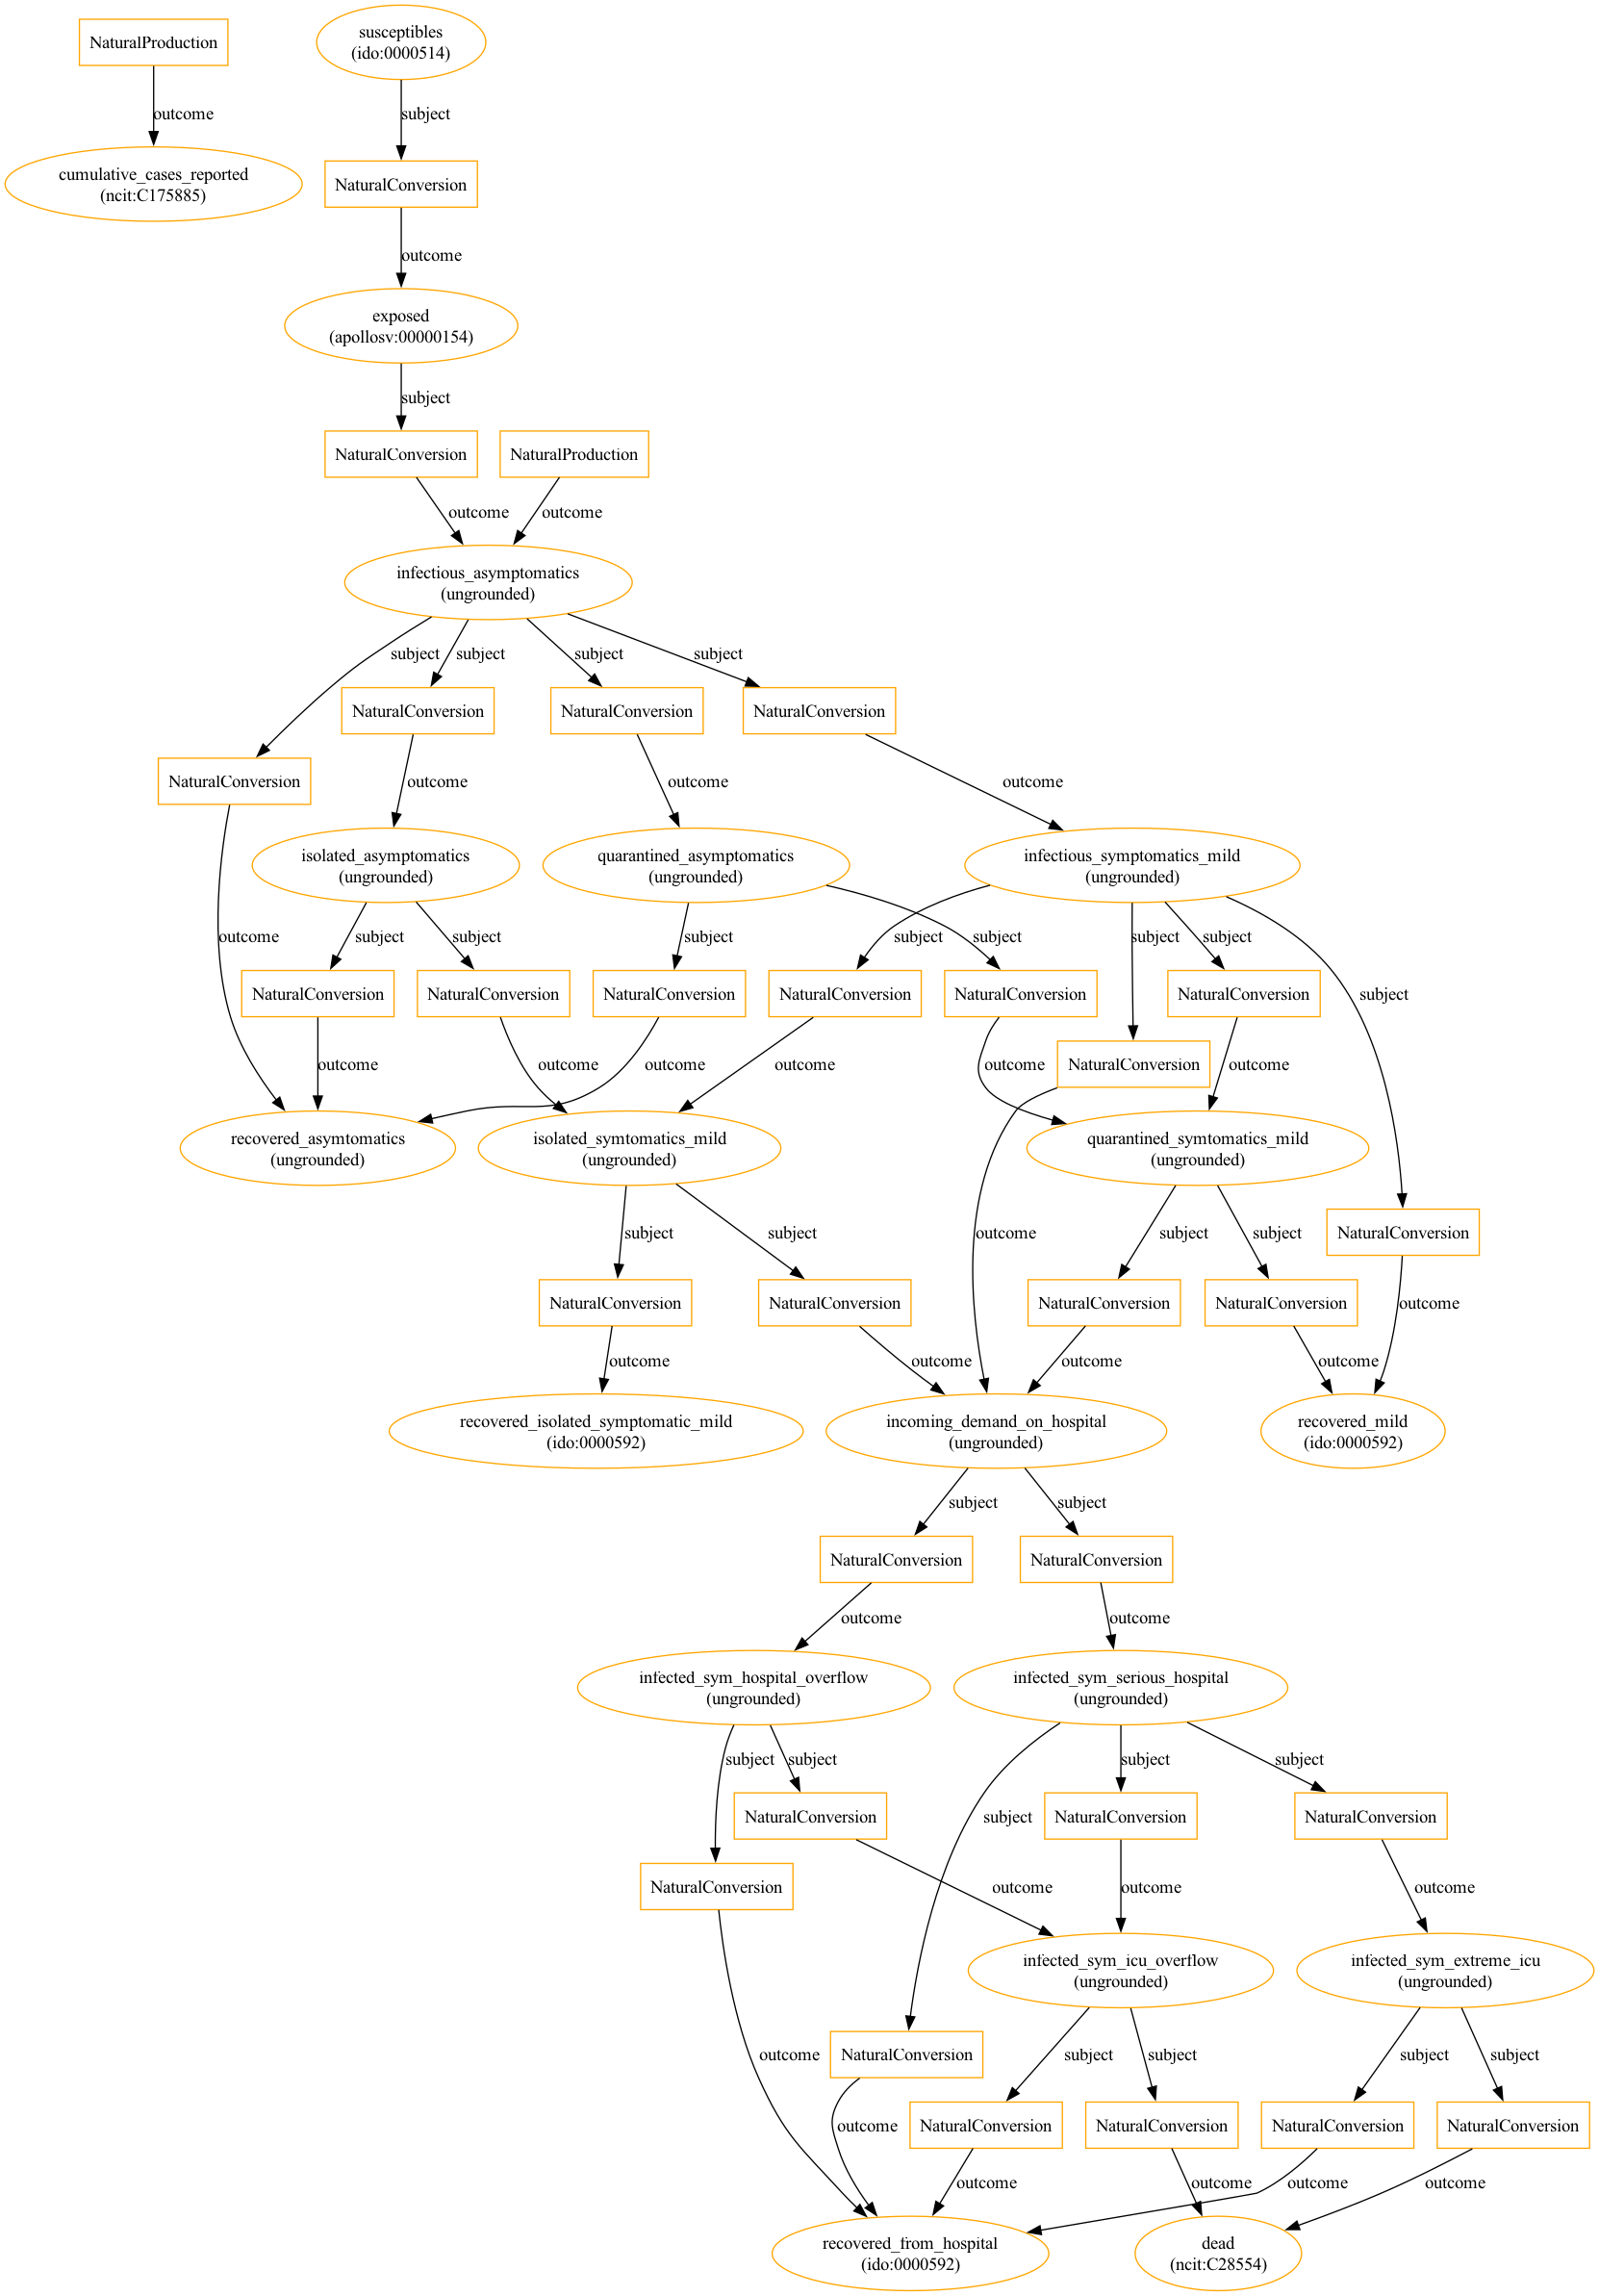

In [5]:
tm.draw_jupyter()

## Print the parameters and their values

In [6]:
rows = [
    (parameter_name, parameter.value)
    for parameter_name, parameter in tm.parameters.items()
]
pd.DataFrame(rows, columns=["name", "value"])

,name,value
0,open_duration,10.0
1,end_lockdown_time,400.0
2,lockdown_period,0.0
3,high_contact_tracing_and_isolation,0.0
4,net_fr_requiring_icu,0.0
...,...,...
129,sum_recovered_asym,0.0
130,sum_recovered_mild,0.0
131,sumnoninfectives,0.0
132,recoveries_serioush_overflow,0.0


## Print the templates and their associated rate laws

A majority of rate laws for templates are the placeholder value of 0 as their rate-laws contain built-in Vensim functions and involve operations with series data which MIRA does not support yet.

In [7]:
template_rate_laws = [
    (template.name, template.rate_law)
    for template in tm.templates
]
pd.DataFrame(template_rate_laws, columns=["name", "rate_law"])

,name,rate_law
0,1,disease_progression + isolation_rate_asym + is...
1,2,0
2,3,0
3,4,contacts_total_per_susceptible*infectivity*sus...
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


## Display the output Stock and Flow amr for the MIRA template model created from ingesting the Vensim model

In [8]:
# FIXME need to get header information in there correctly

amr = template_model_to_stockflow_json(tm)
HERE.joinpath("scenario_5_stockflow.json").write_text(json.dumps(amr, indent=2))
amr

{'header': {'name': 'SIR Model',
  'schema': '',
  'description': 'SIR Model',
  'schema_name': 'stockflow',
  'model_version': '0.1'},
 'properties': {},
 'model': {'flows': [{'id': '1',
    'name': 'new_cases_reported',
    'upstream_stock': None,
    'downstream_stock': 'cumulative_cases_reported',
    'rate_expression': 'disease_progression + isolation_rate_asym + isolation_rate_sym + q_disease_progress_rate',
    'rate_expression_mathml': '<apply><plus/><ci>disease_progression</ci><ci>isolation_rate_asym</ci><ci>isolation_rate_sym</ci><ci>q_disease_progress_rate</ci></apply>'},
   {'id': '2',
    'name': 'deaths',
    'upstream_stock': 'infected_sym_extreme_icu',
    'downstream_stock': 'dead',
    'rate_expression': '0',
    'rate_expression_mathml': '<cn>0</cn>'},
   {'id': '3',
    'name': 'deaths_overflow',
    'upstream_stock': 'infected_sym_icu_overflow',
    'downstream_stock': 'dead',
    'rate_expression': '0',
    'rate_expression_mathml': '<cn>0</cn>'},
   {'id': '4',
 